Model 1 parameters: 1153
Model 2 parameters: 1185


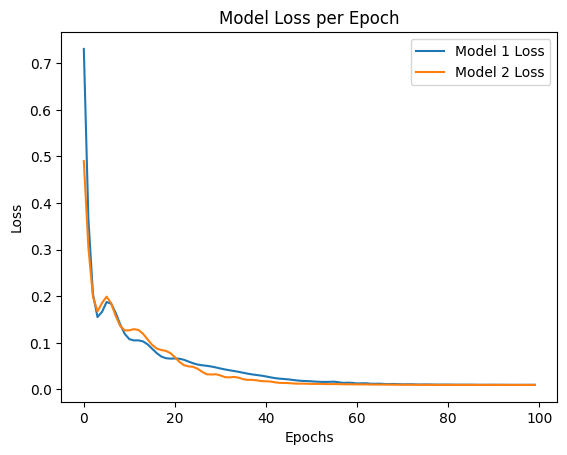

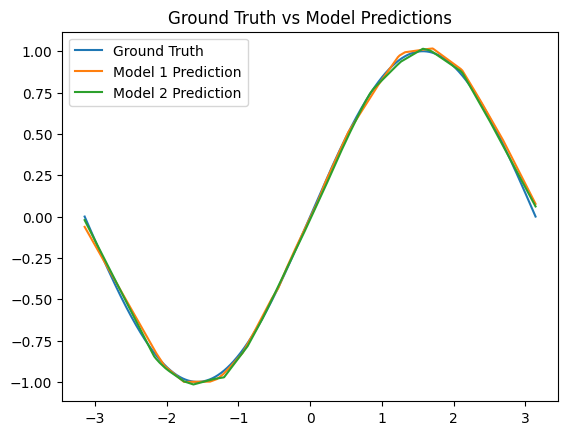

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the non-linear data
np.random.seed(0)
x = np.linspace(-np.pi, np.pi, 1000)
y = np.sin(x)

# Convert the data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Add some noise to the data
y_noise = y + 0.1 * np.random.normal(size=y.shape)
y_noise_tensor = torch.tensor(y_noise, dtype=torch.float32).view(-1, 1)

# Step 2: Define two different DNN models with the same number of parameters
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
#         self.fc1 = nn.Linear(1, 64)
#         self.fc2 = nn.Linear(64, 64)
#         self.fc3 = nn.Linear(64, 1)

        self.fc1 = nn.Linear(1, 32)
        self.fc2 = nn.Linear(32, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
#         self.fc1 = nn.Linear(1, 32)
#         self.fc2 = nn.Linear(32, 128)
#         self.fc3 = nn.Linear(128, 1)
        self.fc1 = nn.Linear(1, 16)
        self.fc2 = nn.Linear(16, 64)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Instantiate models
model_1 = Model1()
model_2 = Model2()

# Count parameters to ensure both models have the same number of parameters
print(f"Model 1 parameters: {sum(p.numel() for p in model_1.parameters())}")
print(f"Model 2 parameters: {sum(p.numel() for p in model_2.parameters())}")

# Step 3: Define the training function
def train_model(model, x, y, epochs=100, learning_rate=0.01):
    criterion = nn.MSELoss()  # Mean Squared Error loss
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        y_pred = model(x)
        loss = criterion(y_pred, y)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return losses

# Step 4: Train both models and record the loss
loss_1 = train_model(model_1, x_tensor, y_noise_tensor, epochs=100)
loss_2 = train_model(model_2, x_tensor, y_noise_tensor, epochs=100)

# Plot the training losses
plt.plot(loss_1, label='Model 1 Loss')
plt.plot(loss_2, label='Model 2 Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 5: Visualize the ground-truth vs predictions
model_1.eval()  # Set the model to evaluation mode
model_2.eval()

with torch.no_grad():  # Disable gradient calculation
    y_pred_1 = model_1(x_tensor).numpy()
    y_pred_2 = model_2(x_tensor).numpy()

# Plot ground-truth vs predictions
plt.plot(x, y, label='Ground Truth')
plt.plot(x, y_pred_1, label='Model 1 Prediction')
plt.plot(x, y_pred_2, label='Model 2 Prediction')
plt.title('Ground Truth vs Model Predictions')
plt.legend()
plt.show()


### **Simulate a function**

Model 1 parameters: 2241
Model 2 parameters: 2209

Training Model 1 on sin(x)...

Training Model 1 on x^3...

Training Model 2 on sin(x)...

Training Model 2 on x^3...


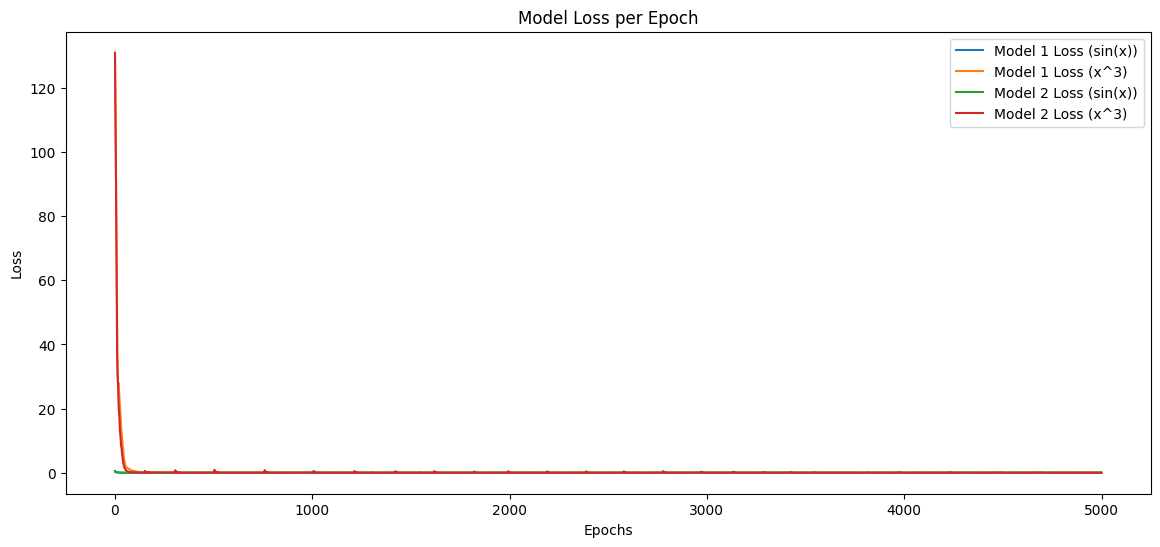

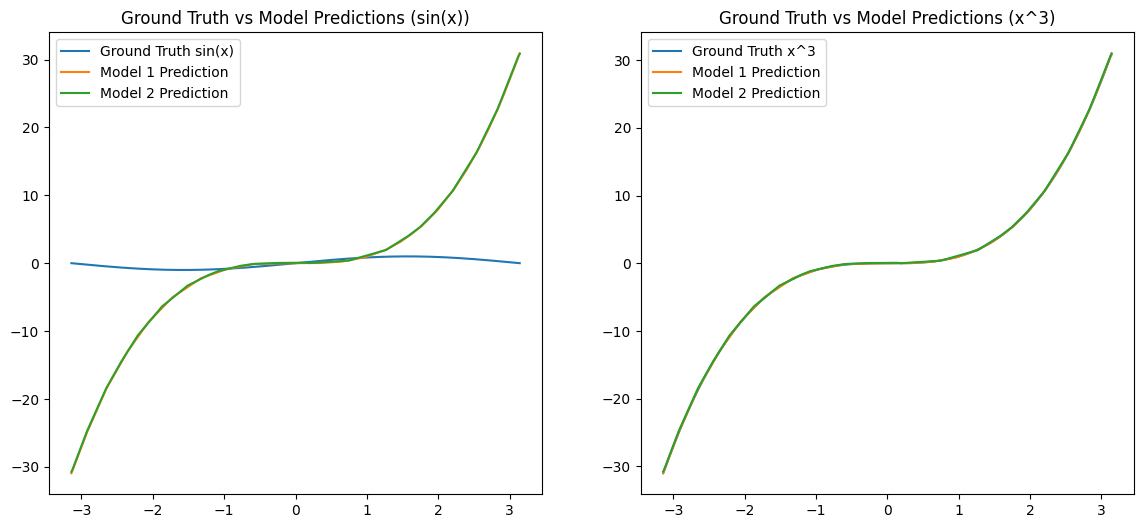

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Define the functions
def function_1(x):
    return np.sin(x)

def function_2(x):
    return x**3

# Generate data for both functions
x = np.linspace(-np.pi, np.pi, 1000)
y1 = function_1(x)
y2 = function_2(x)

# Add noise
y1_noise = y1 + 0.1 * np.random.normal(size=y1.shape)
y2_noise = y2 + 0.1 * np.random.normal(size=y2.shape)

# Convert data to PyTorch tensors
x_tensor = torch.tensor(x, dtype=torch.float32).view(-1, 1)
y1_tensor = torch.tensor(y1_noise, dtype=torch.float32).view(-1, 1)
y2_tensor = torch.tensor(y2_noise, dtype=torch.float32).view(-1, 1)

# Define the models
class Model1(nn.Module):
    def __init__(self):
        super(Model1, self).__init__()
        self.fc1 = nn.Linear(1, 64)   # Increased the hidden layer size
        self.fc2 = nn.Linear(64, 32)  # Added an extra hidden layer
        self.fc3 = nn.Linear(32, 1)    # Output layer remains 1

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        return self.fc3(x)

# Define the second model
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(1, 48)    # Different hidden layer size
        self.fc2 = nn.Linear(48, 32)   # Another hidden layer with 64 units
        self.fc3 = nn.Linear(32, 16)   # Added an additional layer with 32 units
        self.fc4 = nn.Linear(16, 1)    # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        return self.fc4(x)

# Function to count parameters
def count_parameters(model):
    return sum(p.numel() for p in model.parameters())

# # Print parameter counts
# models = {'SimpleDNN': SimpleDNN(), 'DeeperDNN': DeeperDNN(), 'ComplexDNN': ComplexDNN()}
# for name, model in models.items():
#     print(f"{name} parameters: {count_parameters(model)}")

# Print parameter counts
models = {'Model 1': Model1(), 'Model 2': Model2()}
for name, model in models.items():
    print(f"{name} parameters: {count_parameters(model)}")

# Training function
def train_model(model, x, y, epochs=5000, learning_rate=0.01):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        y_pred = model(x)
        loss = criterion(y_pred, y)

        loss.backward()
        optimizer.step()

        losses.append(loss.item())

    return losses

# Train models on both functions and record the loss
losses = {}
for name, model in models.items():
    print(f"\nTraining {name} on sin(x)...")
    losses[f"{name}_sin"] = train_model(model, x_tensor, y1_tensor)

    print(f"\nTraining {name} on x^3...")
    losses[f"{name}_x3"] = train_model(model, x_tensor, y2_tensor)

# Plot training losses
plt.figure(figsize=(14, 6))
for name in models.keys():
    plt.plot(losses[f"{name}_sin"], label=f'{name} Loss (sin(x))')
    plt.plot(losses[f"{name}_x3"], label=f'{name} Loss (x^3)')
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate and plot predictions
plt.figure(figsize=(14, 6))

# Plot for sin(x)
plt.subplot(1, 2, 1)
plt.plot(x, y1, label='Ground Truth sin(x)')
with torch.no_grad():
    for name, model in models.items():
        model.eval()
        y_pred = model(x_tensor).numpy()
        plt.plot(x, y_pred, label=f'{name} Prediction')
plt.title('Ground Truth vs Model Predictions (sin(x))')
plt.legend()

# Plot for x^2
plt.subplot(1, 2, 2)
plt.plot(x, y2, label='Ground Truth x^3')
with torch.no_grad():
    for name, model in models.items():
        model.eval()
        y_pred = model(x_tensor).numpy()
        plt.plot(x, y_pred, label=f'{name} Prediction')
plt.title('Ground Truth vs Model Predictions (x^3)')
plt.legend()

plt.show()


100%|██████████| 170498071/170498071 [00:02<00:00, 63972487.81it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Model 1 parameters: 69722
Model 2 parameters: 21334
Epoch 1, Loss: 1.5336, Accuracy: 45.00%
Epoch 2, Loss: 1.2016, Accuracy: 57.38%
Epoch 3, Loss: 1.0639, Accuracy: 62.39%
Epoch 4, Loss: 0.9854, Accuracy: 65.39%
Epoch 5, Loss: 0.9285, Accuracy: 67.54%
Epoch 6, Loss: 0.8823, Accuracy: 69.12%
Epoch 7, Loss: 0.8472, Accuracy: 70.30%
Epoch 8, Loss: 0.8141, Accuracy: 71.63%
Epoch 9, Loss: 0.7898, Accuracy: 72.37%
Epoch 10, Loss: 0.7660, Accuracy: 73.27%
Epoch 11, Loss: 0.7416, Accuracy: 73.92%
Epoch 12, Loss: 0.7189, Accuracy: 74.74%
Epoch 13, Loss: 0.6992, Accuracy: 75.31%
Epoch 14, Loss: 0.6832, Accuracy: 75.99%
Epoch 15, Loss: 0.6700, Accuracy: 76.38%
Epoch 16, Loss: 0.6490, Accuracy: 77.17%
Epoch 17, Loss: 0.6398, Accuracy: 77.31%
Epoch 18, Loss: 0.6240, Accuracy: 77.92%
Epoch 19, Loss: 0.6109, Accuracy: 78.35%
Epoch 20, Loss: 0.5965, Accuracy: 78.83%
Epoch 21, Loss: 0.5862, Accuracy: 79.29%
Epoch 2

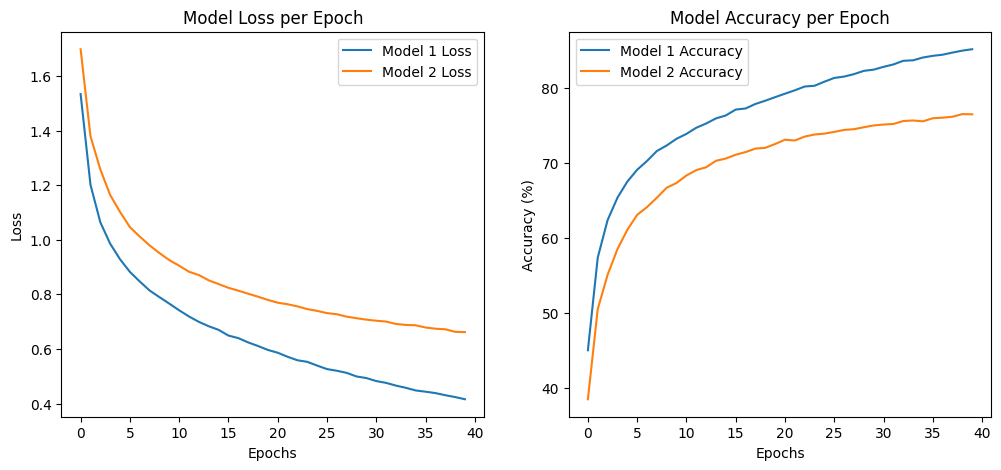

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Step 1: Load CIFAR-10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False, num_workers=2)

# Step 2: Build two different CNN models with the same number of parameters
class CNN_Model1(nn.Module):
    def __init__(self):
        super(CNN_Model1, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 3, padding=1)
        self.conv2 = nn.Conv2d(12, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 8 * 8)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

class CNN_Model2(nn.Module):
    def __init__(self):
        super(CNN_Model2, self).__init__()
        self.conv1 = nn.Conv2d(3, 8, 3, padding=1)
        self.conv2 = nn.Conv2d(8, 12, 3, padding=1)
        self.conv3 = nn.Conv2d(12, 32, 3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 4 * 4, 32)
        self.fc2 = nn.Linear(32, 10)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = self.pool(torch.relu(self.conv3(x)))
        x = x.view(-1, 32 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate models
model_1 = CNN_Model1()
model_2 = CNN_Model2()

# Check parameter count to ensure both have the same number of parameters
print(f"Model 1 parameters: {sum(p.numel() for p in model_1.parameters() if p.requires_grad)}")
print(f"Model 2 parameters: {sum(p.numel() for p in model_2.parameters() if p.requires_grad)}")

# Step 3: Train the models
criterion = nn.CrossEntropyLoss()

def train_model(model, trainloader, testloader, epochs=10):
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    train_loss = []
    train_accuracy = []

    for epoch in range(epochs):
        running_loss = 0.0
        correct = 0
        total = 0

        for i, data in enumerate(trainloader, 0):
            inputs, labels = data
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # Track loss
            running_loss += loss.item()

            # Track accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

        # Average loss for the epoch
        epoch_loss = running_loss / len(trainloader)
        epoch_accuracy = 100 * correct / total
        train_loss.append(epoch_loss)
        train_accuracy.append(epoch_accuracy)

        print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')

    return train_loss, train_accuracy

# Train both models
loss_1, accuracy_1 = train_model(model_1, trainloader, testloader, epochs=40)
loss_2, accuracy_2 = train_model(model_2, trainloader, testloader, epochs=40)

# Step 4: Visualize the training process (loss and accuracy)
plt.figure(figsize=(12, 5))

# Plot the loss
plt.subplot(1, 2, 1)
plt.plot(loss_1, label='Model 1 Loss')
plt.plot(loss_2, label='Model 2 Loss')
plt.title('Model Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy_1, label='Model 1 Accuracy')
plt.plot(accuracy_2, label='Model 2 Accuracy')
plt.title('Model Accuracy per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.show()
